The first step to creating HOD catalogs with AbacusHOD is to "prepare" the simulation outputs. In this step, we drastically downsample both halos and particles and save them in a `subsample_dir` of choice, specified in the `lc_hod.yaml` file, which also contains information about the desired redshift, simulation name, output directory, galaxy tracers (ELGs, LRGs, QSOs), HOD parameters and decorations.

One can then run the `prepare_sim.py` script with:
`python -m abacusnbody.hod.prepare_sim.py --path2config /path/to/tutorial_lc/config/lc_hod.yaml`.
or if cloning the github repo, you can find the script here:
`python /path/to/repos/abacusutils/abacusnbody/hod/prepare_sim.py --path2config path/to/tutorial_lc/config/lc_hod.yaml`

Once that is done, you are ready to run as many mocks as you would like on this redshift catalog and simulation with different HOD parameters and decorations that can be specified in the `yaml` file. To do so, run:
`python /path/to/tutorial_lc/run_lc_hod.py --path2config /path/to/tutorial_lc/config/lc_hod.yaml`

The final output is in ASCII format and can be read using `astropy`.

In [5]:
import numpy as np
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from astropy.io import ascii

In [2]:
# output_dir as specified in the yaml file contains the galaxy mock catalogs
gal_fn = "/mnt/marvin1/boryanah/tutorial_lc/mocks_lc/AbacusSummit_base_c000_ph000/z0.200/galaxies_rsd/LRGs.dat"
gal_array = ascii.read(gal_fn)

In [3]:
gal_array

x,y,z,vx,vy,vz,mass,id
float64,float64,float64,float64,float64,float64,float64,int64
-989.5211854963334,-795.2209044171506,-435.452707825493,-316.9319152832031,-90.24874877929688,-64.17237091064453,49438979920940.25,1632534
-989.7788809602816,-444.18386788750325,-800.8118323517119,-204.7851104736328,89.4765396118164,-131.2910614013672,200037945888891.22,1673146
-989.1402379285971,-987.0081882913663,-355.9616014600487,-184.0806427001953,113.68415069580078,587.5736694335938,21291177948973.67,1839284
-989.3769572090973,-978.6786558404447,-346.5238873294322,-201.04518127441406,61.161251068115234,820.2606811523438,1111485961278.7642,1840226
-988.1982939423249,-967.3164670657677,-348.0650921886748,-371.00146484375,-62.42314529418945,631.2686767578125,43951149804721.38,1841503
-989.6077966109577,-890.8815084558821,-388.65209373006746,375.950439453125,-59.867958068847656,434.7193908691406,9273631445432.117,1850435
-989.5471692714775,-882.9278121235682,-401.35476094145224,406.77471923828125,-412.31207275390625,386.5614929199219,8149490995030.636,1851291
-989.1991899123153,-881.4364638286589,-379.3950228158866,381.39776611328125,-284.3842468261719,278.40069580078125,15025096751707.621,1851416
-989.57384445275,-779.6065852324112,-449.310831725709,-566.8693237304688,-6.089807510375977,-4.330872535705566,10486353319692.629,1862679


In [4]:
gal_array.meta

OrderedDict([('Acent', -0.73118963),
             ('Asat', -0.241898268),
             ('Bcent', -0.00937221616),
             ('Bsat', 0.0374532572),
             ('Gal_type', 'LRG'),
             ('Ncent', 30533),
             ('alpha', 1.0),
             ('alpha_c', 0),
             ('alpha_s', 1),
             ('ic', 0.97),
             ('kappa', 1.2),
             ('logM1', 14.3),
             ('logM_cut', 13.1),
             ('s', 0),
             ('s_p', 0),
             ('s_r', 0),
             ('s_v', 0),
             ('sigma', 0.3)])

Let's visualize the mock galaxy catalog!

Text(0.5, 0, 'Z [Mpc/h]')

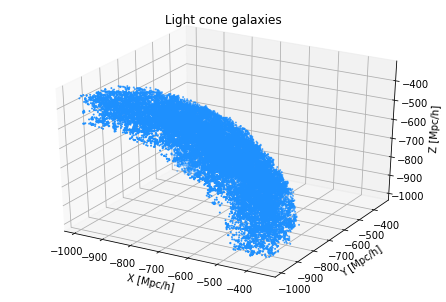

In [7]:
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
  
# creating the plot
ax.scatter(gal_array['x'], gal_array['y'], gal_array['z'], s=1, color='dodgerblue')
  
# setting title and labels
ax.set_title("Light cone galaxies")
ax.set_xlabel('X [Mpc/h]')
ax.set_ylabel('Y [Mpc/h]')
ax.set_zlabel('Z [Mpc/h]')